In [16]:
import matplotlib  
matplotlib.use('Agg')  

import matplotlib.pyplot as plt
import numpy as np

from bandits import BernoulliBandit
from solvers import Solver, EpsilonGreedy, UCB1, BayesianUCB, ThompsonSampling


def plot_results(solvers, solver_names, figname):
    """
    Plot the results by multi-armed bandit solvers.
    Args:
        solvers (list<Solver>): All of them should have been fitted.
        solver_names (list<str)
        figname (str)
    """
    assert len(solvers) == len(solver_names)
    assert all(map(lambda s: isinstance(s, Solver), solvers))
    assert all(map(lambda s: len(s.regrets) > 0, solvers))

    b = solvers[0].bandit

    fig = plt.figure(figsize=(14, 4))
    fig.subplots_adjust(bottom=0.3, wspace=0.3)

    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    # Sub.fig. 1: Regrets in time.
    for i, s in enumerate(solvers):
        ax1.plot(range(len(s.regrets)), s.regrets, label=solver_names[i])

    ax1.set_xlabel('Time step')
    ax1.set_ylabel('Cumulative regret')
    ax1.legend(loc=9, bbox_to_anchor=(1.82, -0.25), ncol=5)
    ax1.grid('k', ls='--', alpha=0.3)

    # Sub.fig. 2: Probabilities estimated by solvers.
    sorted_indices = sorted(range(b.n), key=lambda x: b.probas[x])
    ax2.plot(range(b.n), [b.probas[x] for x in sorted_indices], 'k--', markersize=12)
    for s in solvers:
        ax2.plot(range(b.n), [s.estimated_probas[x] for x in sorted_indices], 'x', markeredgewidth=2)
    ax2.set_xlabel('Actions sorted by ' + r'$\theta$')
    ax2.set_ylabel('Estimated')
    ax2.grid('k', ls='--', alpha=0.3)

    # Sub.fig. 3: Action counts
    for s in solvers:
        ax3.plot(range(b.n), np.array(s.counts) / float(len(solvers[0].regrets)), ls='steps', lw=2)
    ax3.set_xlabel('Actions')
    ax3.set_ylabel('Frac. # trials')
    ax3.grid('k', ls='--', alpha=0.3)

    plt.savefig(figname)


def experiment(K, N):
    """
    Run a small experiment on solving a Bernoulli bandit with K slot machines,
    each with a randomly initialized reward probability.
    Args:
        K (int): number of slot machiens.
        N (int): number of time steps to try.
    """

    b = BernoulliBandit(K)
    print ("Randomly generated Bernoulli bandit has reward probabilities:\n", b.probas)
    print ("The best machine has index: {} and proba: {}".format(max(range(K), key=lambda i: b.probas[i]), max(b.probas)))

    test_solvers = [
        # EpsilonGreedy(b, 0),
        # EpsilonGreedy(b, 1),
        EpsilonGreedy(b, 0.01),
        UCB1(b),
        BayesianUCB(b, 3, 1, 1),
        ThompsonSampling(b, 1, 1)
    ]
    names = [
        # 'Full-exploitation',
        # 'Full-exploration',
        r'$\epsilon$' + '-Greedy',
        'UCB1',
        'Bayesian UCB',
        'Thompson Sampling'
    ]

    for s in test_solvers:
        s.run(N)

    plot_results(test_solvers, names, "results_K{}_N{}.png".format(K, N))


Randomly generated Bernoulli bandit has reward probabilities:
 [0.7349151022135862, 0.6833623356927668, 0.10037729584585309, 0.98661459625513, 0.9145911417548903, 0.21457921201342445, 0.6184182491606822, 0.7734339006820748, 0.3436950667976236, 0.3129254119226167]
The best machine has index: 3 and proba: 0.98661459625513


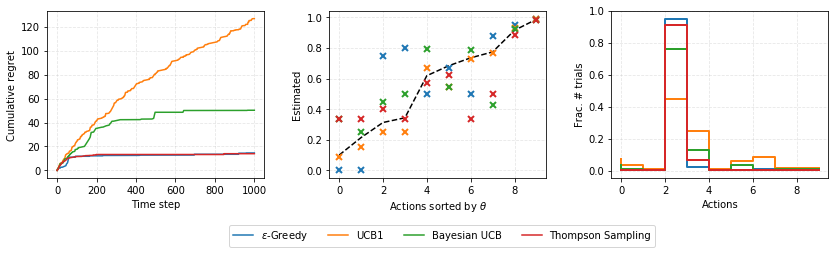

In [4]:
experiment(10, 1000)

In [3]:
%matplotlib inline